<a href="https://colab.research.google.com/github/ibonetc/VisionAPI_TensorFlow_Python/blob/master/IA_DA_WebScraping_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web scraping de imágenes en google, a partir de una búsqueda con palabras claves

In [ ]:
!pip install selenium
!pip install boto3

     |████████████████████████████████| 963 kB 5.0 MB/s 
     |████████████████████████████████| 138 kB 54.5 MB/s 
     |████████████████████████████████| 359 kB 59.9 MB/s 
     |████████████████████████████████| 55 kB 3.9 MB/s 
     |████████████████████████████████| 3.6 MB 42.5 MB/s 
     |████████████████████████████████| 58 kB 5.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.8 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 132 kB 5.2 MB/s 
     |████████████████████████████████| 79 kB 8.8 MB/s 
 

In [ ]:
!apt-get update
!apt install chromium-chromedriver

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backpor

In [ ]:
import os, sys, time
import json, requests, shutil
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

from PIL import Image
import hashlib
import urllib
from binascii import a2b_base64
import matplotlib.pyplot as plt
import io

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [ ]:
def scraping(searchtext,download_path, num_requested=1000):
  number_of_scrolls = num_requested / 400 + 1 # En cada scroll se pueden descargar 400 imágenes
  download_path=download_path + searchtext.replace(" ", "_")
  if not os.path.exists(download_path + searchtext.replace(" ", "_")):
    os.makedirs(download_path + searchtext.replace(" ", "_"))

  url = f'https://www.google.co.in/search?q={searchtext}&source=lnms&tbm=isch'
  
  #driver = webdriver.Chrome('D:/Install/chromedriver.exe')
  #Opción en colab
  chrome_options = webdriver.ChromeOptions()
  chrome_options.add_argument('--headless')
  chrome_options.add_argument('--no-sandbox')
  chrome_options.add_argument('--disable-dev-shm-usage')
  driver =webdriver.Chrome('chromedriver',options=chrome_options)
  ########################################################################
  #driver = webdriver.Firefox()
  
  driver.get(url)

  headers = {}
  headers['User-Agent'] = "Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36"
  extensions = { "jpg", "jpeg", "png", "gif" }
  img_count = 0
  downloaded_img_count = 0
  
  for _ in range(int(number_of_scrolls)):
    for __ in range(10): # Varios scrolls internos para mostrar las 400 imágenes de uno.
      driver.execute_script("window.scrollBy(0, 1000000)")
      time.sleep(0.2)
    time.sleep(0.5) # descargar las próximas 400 imágenes
  sub = driver.find_elements_by_tag_name('img')
  listImages = []
  for image in sub:
    if image.get_attribute('src')!=None:
      listImages.append(image.get_attribute('src'))   
  driver.quit()
  return listImages

In [ ]:
searchtext='Isis Bonet Cruz'
num_requested=1000
download_path='/content/drive/My Drive/FotosGoogle'

In [ ]:
lista=scraping(searchtext,download_path=download_path)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: find_elements_by_tag_name is deprecated. Please use find_elements(by=By.TAG_NAME, value=name) instead


['https://www.gstatic.com/ui/v1/menu/light_thumbnail2.png',
 'https://www.gstatic.com/ui/v1/menu/dark_thumbnail2.png',
 'https://www.gstatic.com/ui/v1/menu/device_default_thumbnail2.png',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR_W9cC35URJhdE4dRfixreNhthK8S9XbAOog&usqp=CAU']
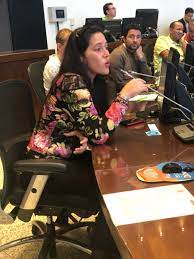
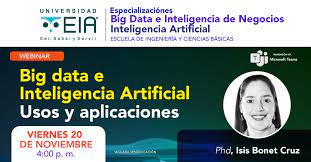
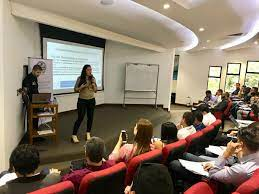
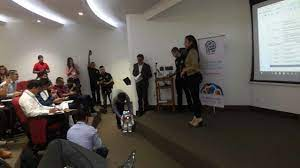
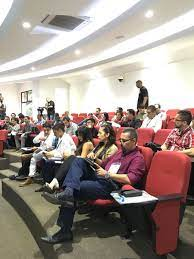
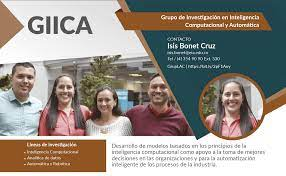
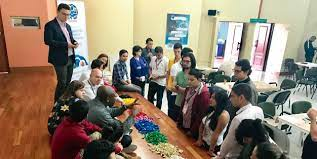
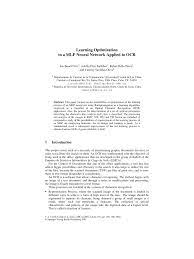
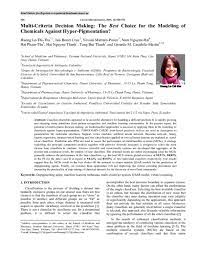
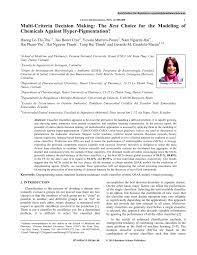
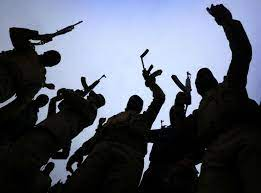
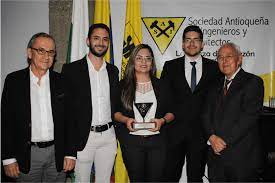
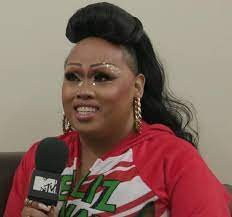
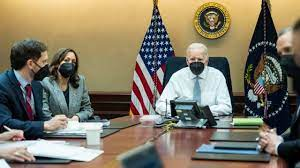
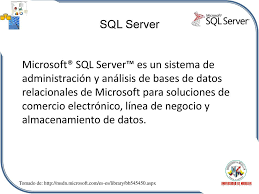
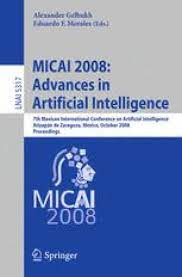
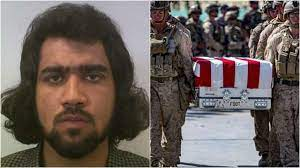
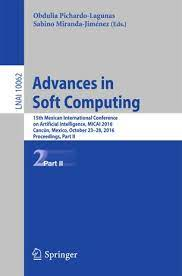
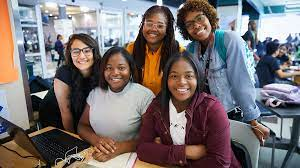
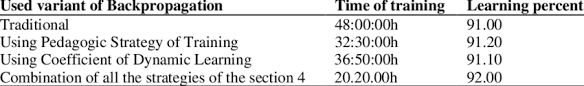

In [ ]:
lista

# Reconocimiento de rostro en url de imágenes encontradas

In [ ]:
!mkdir -p ~/.aws &&\
  cp /content/drive/My\ Drive/AWS/credencials.txt ~/.aws/credentials

In [ ]:
import boto3
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
face = '/content/drive/MyDrive/DatasetRecognition/Isis.jpg'

In [ ]:
client = boto3.client(service_name='rekognition', region_name="us-east-2")

# **Termine comparando todas las imágenes contra la suya**